# Introduction to Transfer Function

Import libraries and define global variables.

In [27]:
# Manipulating arrays
import numpy as np
# Plotting
import matplotlib.pyplot as plt
# Fourier transform, inverse Fourier transform, and get frequencies of
# Fourier transform respectively
from scipy.fftpack import fft, ifft, fftfreq

# Save π as variable `pi`.
pi = np.pi

## Quick Lesson on Fourier Transforms

**Fourier transforms** convert a function &mdash; in our case, voltage as a function of time, $V(t)$ &mdash; into a form that describes the frequencies present in the original function. The Fourier transform is analogous to decomposing the sound of a musical chord into terms of the intensity of each of the pitches. Don't worry if you don't understand it right now, we'll se more of it later.

In [1]:
num_samples = 1e5 # Number of samples
time_span = 50 # Time span of the signal in seconds

print(time_span / num_samples)

0.0005


`times` is an array of 100,000 evenly spaced numbers from 0 to 50 seconds. It represents all the "time points" we will analyze.

In [29]:
times = np.linspace(0, time_span, int(num_samples))
times

array([0.00000e+00, 5.00005e-04, 1.00001e-03, ..., 4.99990e+01,
       4.99995e+01, 5.00000e+01])

Let's define the two angular frequencies that will be present in the waveforms, `frequency1` and `frequency2`.
- `frequency1` is 20 cycles per second

- `frequency2` is 40 cycles per second

In [30]:
frequency1 = 2 * pi * 20
frequency2 = 2 * pi * 40

We will apply attenuation (reduce the amplitude) and phase shift (how far the function is shifted horizontally from the usual position) at those frequencies to simulate the waveform after it goes through the long cable.
- `attenuation1` reduces magnitude of wave to 50% at `frequency1`
- `attenuation2` reduces magnitude of wave to 10% at `frequency2`

- `phaseshift1` shifts wave by +0.5 radians at `frequency1`
- `phaseshift2` shifts wave by -1.0 radians at `frequency2`


In [31]:
attenuation1 = 0.50
attenuation2 = 0.10

phaseshift1 = + 0.5
phaseshift2 = - 1.0

`freqs` represents the possible frequencies we can get given a certain number of samples and the spacing between them:

- `n` is the window length; in other words, it is how many frequency samples we want. Here, we want `n` to be the number of time points we have (100,000).

- `d` is the spacing between the samples. When we created the array `times`, we defined that the spacing between each samples is 0.0005 (`time_span` over `num_samples`), and so is `d`.

In [32]:
n = len(times)
d = time_span / num_samples
print('n =', n, '| d =', d)

freqs = fftfreq(n, d)
freqs

n = 100000 | d = 0.0005


array([ 0.  ,  0.02,  0.04, ..., -0.06, -0.04, -0.02])

## Waveform taken through short cable

Let's create an unrealistic waveform and take it only through the short cable. Because the cable is short, no significant attenuation or phase shift happens, so we will ignore it for now.

Starting with a hypothetical voltage as a function of time:

$$V_{short}(t) = \cos(\omega_1 t) + \cos(\omega_2 t) + \mathcal{N}(0, 0.005)$$

where $\omega_1$ and $\omega_2$ are `frequency1` and `frequency2` respectively, and $\mathcal{N}(0, 0.005)$ is just adding random noise to the function (don't worry about it too much).

In [33]:
voltage_short = np.cos(frequency1 * times) \
                    + np.cos(frequency2 * times) \
                    + np.random.normal(0, 0.005, len(times))
voltage_short

array([2.00281622, 1.99915794, 1.96293142, ..., 1.97228982, 1.98754839,
       2.00309828])

Now, we get the Fourier transform of `voltage_short`, which we save in `ft_short`.

In [34]:
ft_short = fft(voltage_short)
ft_short

array([4.19627569-0.j        , 1.76885636+0.59803821j,
       3.08863283-0.86153688j, ..., 1.66334815-0.55293115j,
       3.08863283+0.86153688j, 1.76885636-0.59803821j])

`ft_short` is an array of complex values (or frequency spaces) $F(\omega)$ that represent each of the frequencies. A frequency space $F(\omega)$ can be separated into magnitude $m$ and phase $\phi$:

$$F(\omega) = m e^{i\phi}$$

where $i = \sqrt{-1}$.

The magnitude $m$ (`magnitude_short`) represents the intensity and the phase $\phi$ (`phase_short`) the phase in radians of each frequency in `freqs`.

In [35]:
magnitude_short = np.abs(ft_short)
magnitude_short

array([4.19627569, 1.86721786, 3.20653997, ..., 1.75284339, 3.20653997,
       1.86721786])

In [36]:
phase_short = np.angle(ft_short)
phase_short

array([-0.        ,  0.32602825, -0.27202359, ..., -0.32092885,
        0.27202359, -0.32602825])

We initially had voltage as a function of time, and now we have the magnitude and phase of each of the frequencies in the waveform. Let's plot it!

Starting with the simplest one, voltage over time for our waveform `voltage_short`. This is the plot of equation

$$V_{short}(t) = \cos(\omega_1 t) + \cos(\omega_2 t) + \mathcal{N}(0, 0.005)$$

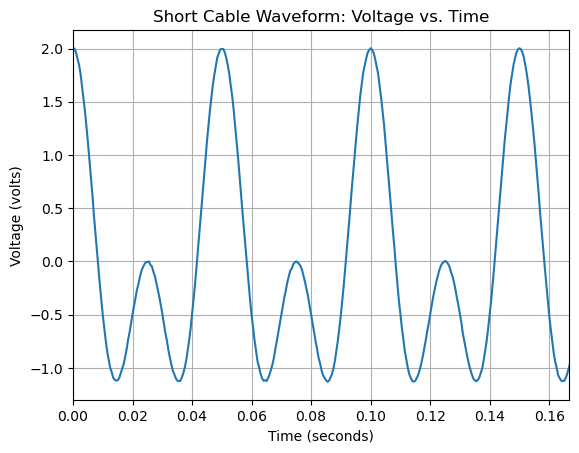

In [37]:
plt.title('Short Cable Waveform: Voltage vs. Time')

x_axis = times
y_axis = voltage_short
plt.plot(x_axis, y_axis)

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (volts)')
plt.xlim(0, time_span / 300) # Limiting the window size for better visualization
plt.grid()
plt.show()

If we plot magnitude versus frequency, we see what frequencies are most prominent on the waveform.

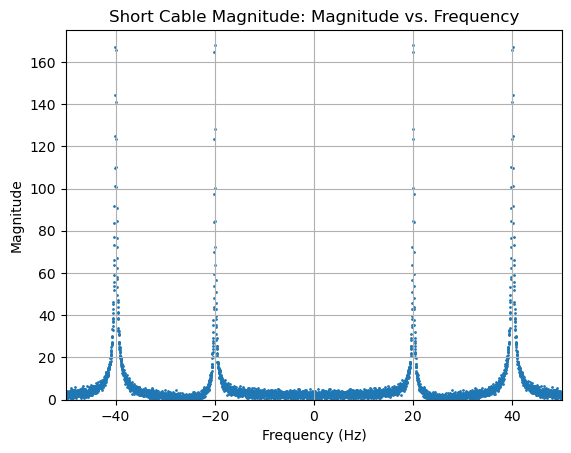

In [38]:
plt.title('Short Cable Magnitude: Magnitude vs. Frequency')

x_axis = freqs
y_axis = magnitude_short
plt.scatter(x_axis, y_axis, s=1)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-50, 50) # No visual peaks besides this point. If you want to try for yourself,
                  # try expanding the limit to see what happens!
plt.ylim(0, 175)
plt.grid()
plt.show()

Notice how there are similar peaks at $\pm$ 20 and $\pm$ 40 hertz. This makes sense because we have two cosine functions, one with the same magnitude of the other, at different frequencies (20 and 40 hertz).

By plotting phase versus frequency, we get:

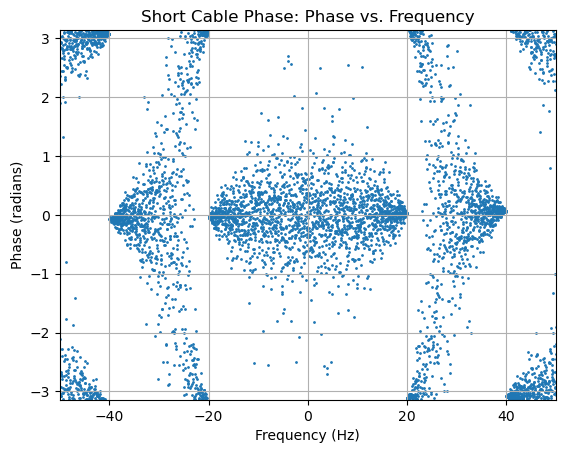

In [39]:
plt.title('Short Cable Phase: Phase vs. Frequency')

x_axis = freqs
y_axis = phase_short
plt.scatter(x_axis, y_axis, s=1)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.xlim(-50, 50)
plt.ylim(-pi, pi)
plt.grid()
plt.show()

Notice how, at $\pm$ 20 and $\pm$ 40 hertz, the phase converges to zero. This makes sense because, in our voltage equation, we added no phase to the cosine functions, so the phase is zero!

The rest of the graph is just noise &mdash; we only care about the phase at frequencies we know the magnitude isn't zero.

## Waveform taken through short cable and long cable

Now, we create an unrealistic waveform and take it through both the previous short cable and the long cable. We define a voltage function for the long cable:

$$V_{both}(t) = a_1 \cos(\omega_1 t + \phi_1) + a_2 \cos(\omega_2 t + \phi_2) + \mathcal{N}(0, 0.001)$$

where $\omega_1$ and $\omega_2$ are `frequency1` and `frequency2`, $phi_1$ and $\phi_2$ are `phaseshift1` and `phaseshift2`, and $a_1$ and $a_2$ are `attenuation1` and `attenuation2` respectively; $\mathcal{N}(0, 0.001)$ is just adding random noise to the function (again, don't worry about it too much).

In [40]:
voltage_both = attenuation1 * np.cos(frequency1 * times + phaseshift1) \
                    + attenuation2 * np.cos(frequency2 * times + phaseshift2) \
                    + np.random.normal(0, 0.001, len(times))
voltage_both

array([0.49199463, 0.48808823, 0.47908   , ..., 0.49716849, 0.49653943,
       0.49315969])

Similarly to the previous steps, let's take the Fourier transform of `voltage_both` and save it to `ft_both`. Then, we separate the information from `ft_both` into `magnitude_both` and `phase_both`.

In [41]:
ft_both = fft(voltage_both)
magnitude_both = np.abs(ft_both)
phase_both = np.angle(ft_both)

Let's see what this looks like.

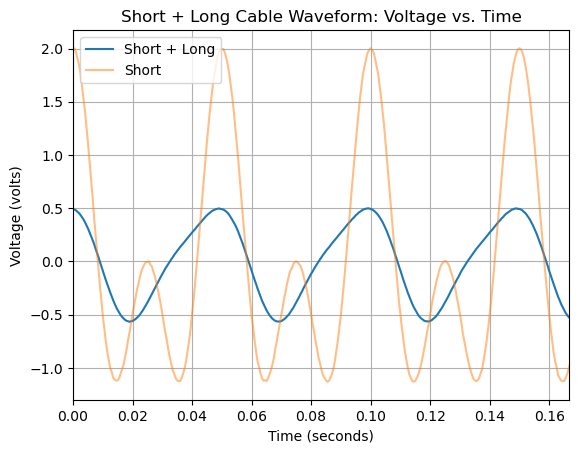

In [42]:
plt.title('Short + Long Cable Waveform: Voltage vs. Time')

x_axis_both = times
y_axis_both = voltage_both
plt.plot(x_axis_both, y_axis_both, label='Short + Long')

x_axis_short = times
y_axis_short = voltage_short
plt.plot(x_axis_short, y_axis_short, label='Short', alpha=0.5)

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (volts)')
plt.xlim(0, time_span / 300) # Limiting the window size for better visualization
plt.grid()
plt.legend()
plt.show()

Notice how much the shape of the wave changed after we introduced some attenuation and phase shift. The peaks and throughs seem somewhat consisted with the initial wave, but we have lost a lot of information regardless.

Let us analyze magnitude versus frequency for the long cable now.

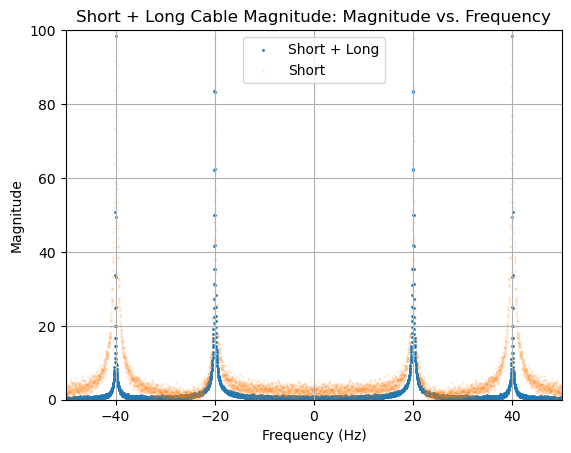

In [43]:
plt.title('Short + Long Cable Magnitude: Magnitude vs. Frequency')

x_axis_both = freqs
y_axis_both = magnitude_both
plt.scatter(x_axis_both, y_axis_both, s=1, label='Short + Long')

x_axis_short = freqs
y_axis_short = magnitude_short
plt.scatter(x_axis_short, y_axis_short, s=1, label='Short', alpha=0.1)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-50, 50)
plt.ylim(0, 100)
plt.legend()
plt.grid()
plt.show()

We still see peaks at $\pm$ 20 and $\pm$ 40 hertz, but they are relatively smaller since we set attenuation to be 50% and 10%.

Now, phase versus frequency:

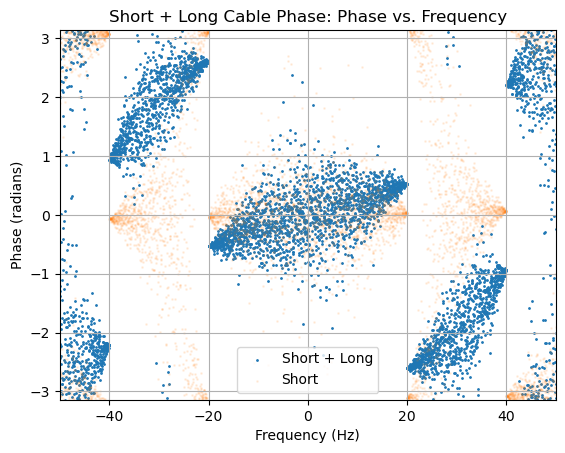

In [44]:
plt.title('Short + Long Cable Phase: Phase vs. Frequency')

x_axis_both = freqs
y_axis_both = phase_both
plt.scatter(x_axis_both, y_axis_both, s=1, label='Short + Long')

x_axis_short = freqs
y_axis_short = phase_short
plt.scatter(x_axis_short, y_axis_short, s=1, label='Short', alpha=0.1)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.xlim(-50, 50)
plt.ylim(-pi, pi)
plt.legend()
plt.grid()
plt.show()

The phases are $\pm$ 0.5 radians at a frequency of 20 hertz, and $\mp$ 1.0 radians at a frequency of 40 hertz. Notice how the points are only shifted; they still maintain the same disposition!

## Transfer Function: What does the long cable do by itself?

Ultimately, our focus is to understand how the long cable behaves. Until now, we have how the short cable works and how it works with the long cable. Intuitively, to find the behavior of the long cable, we just find the difference in the data between both cables together and only the long cable.

To find this difference, let's analyze this in terms of frequency spaces. The frequency space of both cables together is

$$F_\text{b}(\omega) = m_\text{b}(\omega) e^{i \phi_\text{b}(\omega)}$$

We'll get rid of the functions of $\omega$ for simplicity. We can do the following to $F_\text{b}$ without altering the validity of the equation:

$$F_\text{b} =
    m_\text{b} e^{i \phi_\text{b}} \times
    \frac{m_\text{s} e^{i \phi_\text{s}}}{m_\text{s} e^{i \phi_\text{s}}}$$

By rearranging the equation above, we get:

$$F_\text{b} =
    m_\text{s} e^{i \phi_\text{s}} \times
    \frac{m_\text{b} e^{i \phi_\text{b}}}{m_\text{s} e^{i \phi_\text{s}}}$$

After some algebra, we reach

$$F_\text{b} =
    F_\text{s} \times
    \frac{m_\text{b}}{m_\text{s}} e^{i(\phi_\text{b} - \phi_\text{s})}$$

To simplify, let's call $m_\text{l}$ the magnitude ratio between the magnitude of both cables and short cable and $\phi_\text{l}$ the difference between both cables and short cable.

$$m_\text{l} = \frac{m_\text{b}}{m_\text{s}}, \ \ \ \phi_\text{l} = \phi_\text{b} - \phi_\text{s}$$

This tells us something really important about the behavior of the long cable by itself: The magnitude ratio represents the magnitude of the long cable because $m_\text{b}$ is, in essence, $m_\text{l} * m_\text{s}$. The $m_\text{s}$ terms cancel out, leaving only $m_\text{l}$ behind. A similar approach is taken to find the phase difference; $\phi_\text{b}$ is $\phi_\text{l} + \phi_\text{s}$, and so again the $\phi_\text{s}$ terms cancel out leaving $\phi_\text{l}$ behind.

Finally, we call the following **long-cable transfer function**:

$$T_\text{l} = m_\text{l} e^{i \phi_\text{l}} =
    \frac{m_\text{b}}{m_\text{s}} e^{i(\phi_\text{b} - \phi_\text{s})}$$

Notice how we call it the "long-cable" transfer function because it refers to finding the long-cable behavior based on both cables and short cable.  We use the transfer function $T$ as a multiplicative factor in frequency space.

In [52]:
magnitude_long = magnitude_both / magnitude_short
phase_long = phase_both - phase_short

Let's find a simulated magnitude and of both cables. Since since the waveform we're simulating is the same as the one we used to find the magnitude ratio and phase difference, our final result for `voltage_both_simulated` and `voltage_both` should be identical. In reality, we would be using our result for `magnitude_long` and `phase_long` to describe the behavior of different signals going through those same cables.

To find `magnitude_both_simulated`, multiply the magnitude of short cable by the magnitude ratio $m_\text{l}$. To find `phase_long_simulated`, add the phase difference $\phi_\text{l}$ to the phase of the short cable.

In [54]:
magnitude_both_simulated = magnitude_short * magnitude_long
phase_both_simulated = phase_short + phase_long

To revert from magnitude and phase and go back to the voltage function, we must do the inverse of the Fourier transform, called, to our surprise, **inverse Fourier transform**. We use the function `ifft` to perform this operation.

In [2]:
voltage_both_simulated = ifft( magnitude_both_simulated * np.exp(1j * phase_both_simulated) )

NameError: name 'ifft' is not defined

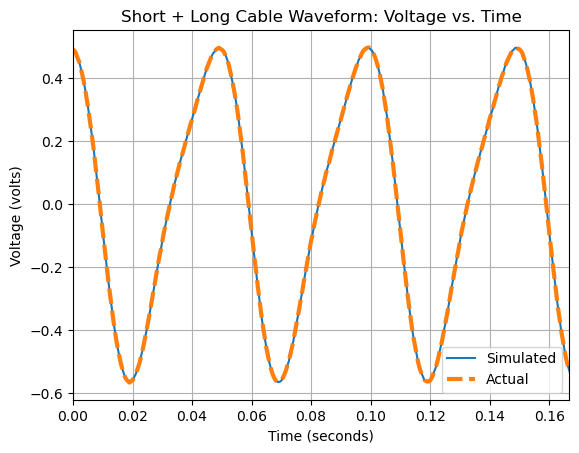

In [65]:
plt.title('Short + Long Cable Waveform: Voltage vs. Time')

x_axis_long_simulated = times
y_axis_long_simulated = voltage_both_simulated
plt.plot(x_axis_both, y_axis_both, label='Simulated')

x_axis_both = times
y_axis_both = voltage_both
plt.plot(x_axis_both, y_axis_both, label='Actual', linestyle='dashed', linewidth=3)

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (volts)')
plt.xlim(0, time_span / 300) # Limiting the window size for better visualization
plt.grid()
plt.legend()
plt.show()

Notice how the waveforms for both simulated and actual voltage functions are identical. This is expected because we found the Fourier transform of the function and then reverted back.

For a different waveform through the short cable, we can still use the same magnitude ration and phase difference to find what the waveform looks like after going through both cables. That's because for the same cable, the magnitude ration and phase shift does not change, no matter the waveform. For most cables, we can measure the magnitude ratio and phase shift once, and apply it to any waveform we want to study.